In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.stats import gaussian_kde
import scipy.stats as stats

In [2]:
def density_plot(v1,v2):
    xy = np.vstack([v1, v2])
    z = gaussian_kde(xy)(xy)
    data = z / (z.max() - z.min())

    r = stats.pearsonr(v1,v2)
    print('pears', stats.pearsonr(v1,v2))
    
    return data, r

In [3]:
import matplotlib.patches as patches
def draw_map_pixel(ax, t, lat, lon, title='', clabel='', cmap='RdBu_r', bottom_label=True, **kwargs):
    
    plt.pcolormesh(lon, lat, t, transform=ccrs.PlateCarree(), cmap=cmap, **kwargs)
    ax.coastlines()
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='dashed');

    plt.grid(which='minor')
    
    xl.top_labels = False
    xl.right_labels = False
    xl.xlines = False
    xl.ylines=False
    xl.bottom_labels = bottom_label

    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label(clabel)

In [5]:
from matplotlib.colors import BoundaryNorm
def discrete_cmap_norm(levels, cmap):

    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap(cmap)
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    return norm

In [7]:
path = '/home/ck/DIR/cornkle/data/LMCS/GLOBAL_MCS/fig4_code_v2/'

In [8]:
#ERA5
corr_max = xr.open_dataarray(path+'era5_correlation_sm_versus_ushear_rainySeason.nc')
#CMIP
sh_merge = xr.open_dataarray(path+'cmip_sh.nc')
shear_merge = xr.open_dataarray(path+'cmip_ushear.nc')
tas_merge = xr.open_dataarray(path+'cmip_tas.nc')
finmask = xr.open_dataarray(path+'cmip_seamask.nc')
#CMIP scatter
cmip_scatter = pd.read_csv(path+'cmip_scatter.csv', index_col=0)

<>:90: SyntaxWarning: invalid escape sequence '\D'
<>:102: SyntaxWarning: invalid escape sequence '\D'
<>:113: SyntaxWarning: invalid escape sequence '\D'
<>:90: SyntaxWarning: invalid escape sequence '\D'
<>:102: SyntaxWarning: invalid escape sequence '\D'
<>:113: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_3210/3999881079.py:90: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta$FUT | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10)
/tmp/ipykernel_3210/3999881079.py:102: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta$FUT | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10)
/tmp/ipykernel_3210/3999881079.py:113: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title('$\Delta$FUT  | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10)


pears PearsonRResult(statistic=np.float64(-0.7379669859296911), pvalue=np.float64(4.762829626248848e-43))
pears PearsonRResult(statistic=np.float64(-0.5110558050067369), pvalue=np.float64(1.4326520913277845e-17))
pears PearsonRResult(statistic=np.float64(0.7370222532987805), pvalue=np.float64(6.891253131129103e-43))


/tmp/ipykernel_3210/3999881079.py:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


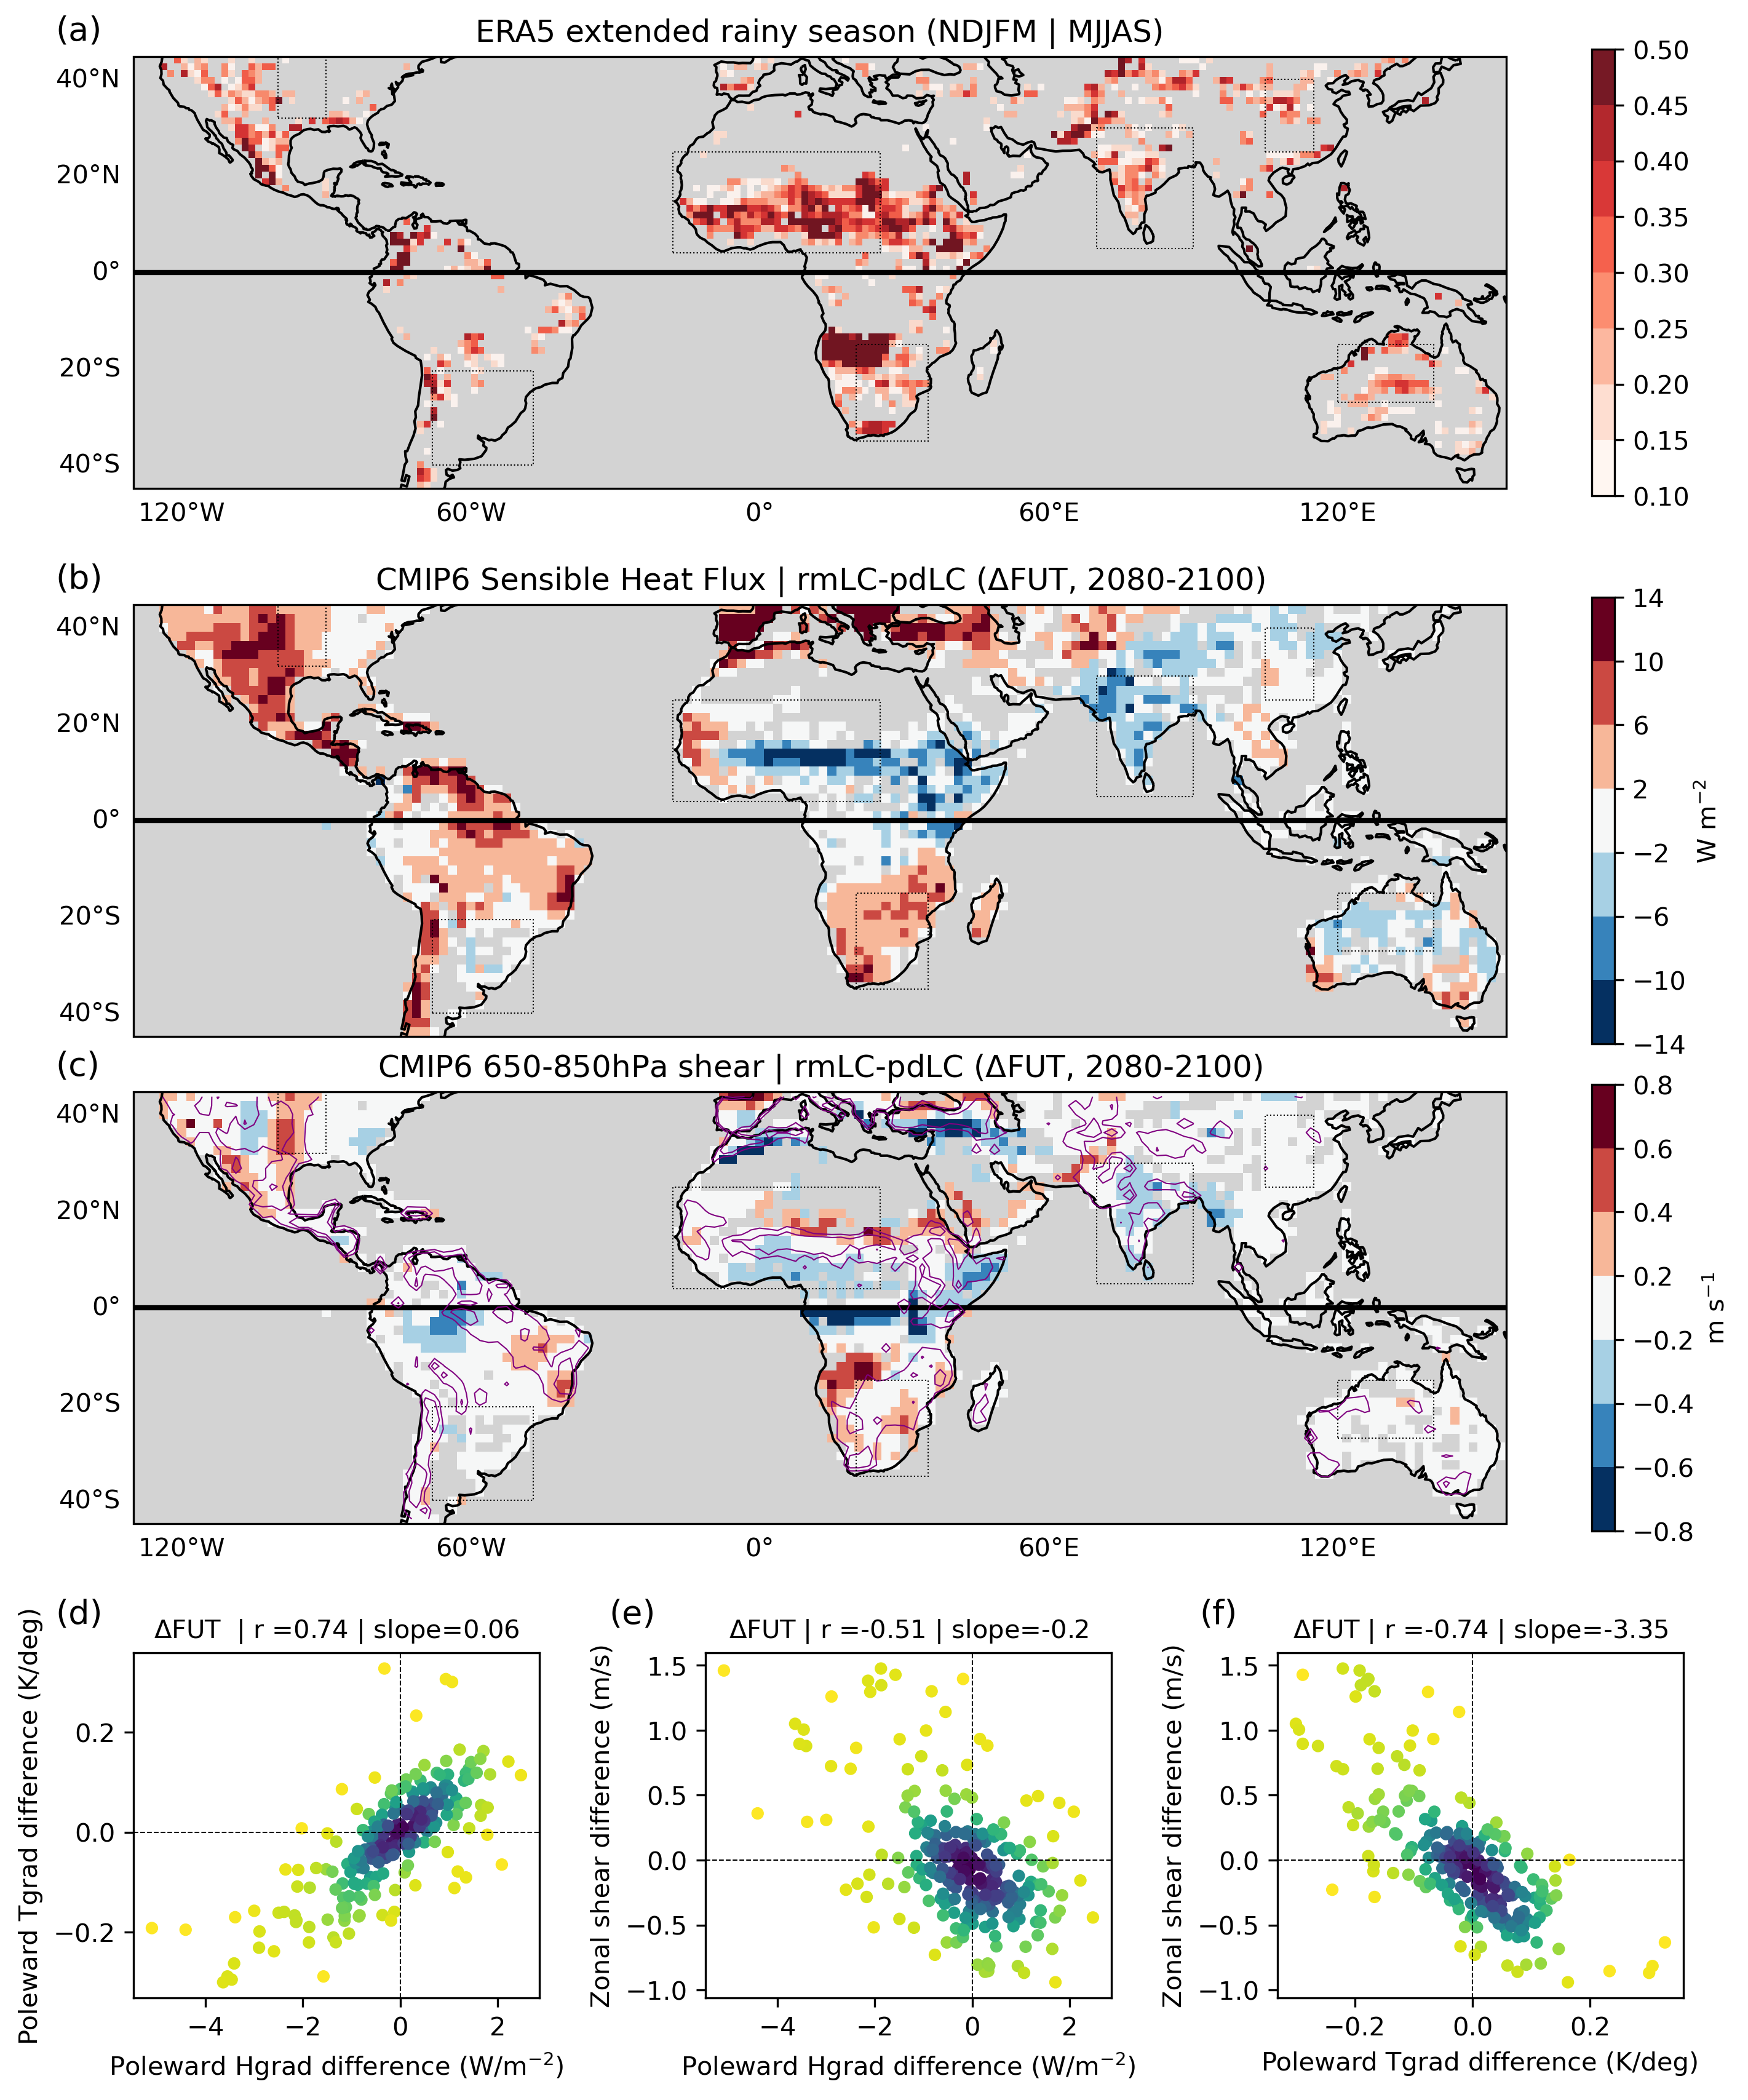

In [9]:
MREGIONS = {
 'GPlains' : [[-100,-90,32,47], 'nam', -6, (1,7), (8,12), (1,12), [-99,-96,42,44], 'GPlains', 'MJJAS', [5,6,7,8,9]], # # 18
 'china' : [[105,115,25,40], 'asia', 8 , (1,7), (8,12), (1,12), [105,107,29,31], 'china', 'MJJAS', [5,6,7,8,9]], # 4
 'india' : [[70,90, 5,30], 'asia', 5, (1,7), (8,12), (1,12), [74,76,24,26], 'india', 'MJJAS', [5,6,7,8,9]], # 7
 'WAf' : [[-18,25,4,25], 'spac', 0, (1,7), (8,12), (1,12), [-5,5,14,16], 'WAf', 'MJJAS', [5,6,7,8,9]], # last is hourly offset to UCT # 12    # [-18,25,4,25]
 'australia' : [[120,140,-27, -15], 'asia', 9, (10,12), (1,5), (1,12), [125,134, -21,-18], 'australia', 'NDJFM', [11,12,1,2,3]], # 3
 'SAf' : [[20,35, -35,-15], 'spac', 2, (9,12), (1,5), (1,12), [21,24.5,-28,-24], 'SAf', 'NDJFM', [11,12,1,2,3]], # 10
 'sub_SA' : [[-68,-47, -40, -20.5], 'spac', -4, (9,12), (1,5), (1,12), [-63,-60,-33,-30], 'sub_SA', 'NDJFM', [11,12,1,2,3]],  # 16
}

norm = discrete_cmap_norm(np.arange(0.1,0.51,0.05), 'Reds')

left, width, width2, height = 0.061, 0.93, 0.22, 0.22#0.345, 0.3
space=0.01
xspace=0.03
bottom=0.08
left2 = left + width + left

p1 = [left, bottom+height+space, width, height]
p2 = [left, bottom+2*height+space+0.02, width, height]
p3 = [left, bottom+3*height+3*space+0.05, width, height]

p4 = [left, bottom, width2, height-0.05]
p5 = [left+width2+3*xspace, bottom, width2, height-0.05]
p6 = [left+2*width2+6*xspace, bottom, width2, height-0.05]


f = plt.figure(figsize=(10,11), dpi=300)

ax = plt.axes(p3, projection=ccrs.PlateCarree())

draw_map_pixel(ax, corr_max , corr_max.latitude, corr_max.longitude, title='', clabel='', cmap='Reds', norm=norm, alpha=0.9) #corr_month['pval']<0.01) &
ax.set_xlim(-130,155)


plt.title('ERA5 extended rainy season (NDJFM | MJJAS)')
ax.axhline(0, linestyle='solid', linewidth=2, color='k')

for reg in MREGIONS.keys():
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.5,edgecolor='k', zorder=99, fill=False, linestyle='dotted')
    ax.add_patch(rect1)

ax.set_facecolor('lightgrey')


###########################


ax = plt.axes(p2, projection=ccrs.PlateCarree())
norm = discrete_cmap_norm([-14,-10,-6,-2,2,6,10,14], 'RdBu')
tasmask = ((sh_merge>0) & (tas_merge>0)) | ((sh_merge<0) & (tas_merge<0))

draw_map_pixel(ax, sh_merge.where(finmask&tasmask),sh_merge.lat, sh_merge.lon, title=r'CMIP6 Sensible Heat Flux | rmLC-pdLC ($\Delta$FUT, 2080-2100)', clabel=r'W m$^{-2}$', norm=norm, bottom_label=False) #np.percentile(k, np.arange(5,91,11) 'W m$^{-2}$'
ax.set_xlim(-130,155)
ax.axhline(0, linestyle='solid', linewidth=2, color='k')

for reg in MREGIONS.keys():
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.5,edgecolor='k', zorder=99, fill=False, linestyle='dotted')
    ax.add_patch(rect1)
ax.set_facecolor('lightgrey')

    
ax = plt.axes(p1, projection=ccrs.PlateCarree())
norm = discrete_cmap_norm([-0.8,-0.6,-0.4, -0.2, 0.2, 0.4,0.6,0.8], 'RdBu')
draw_map_pixel(ax, shear_merge.where(finmask&tasmask) ,shear_merge.lat, shear_merge.lon, title=r'CMIP6 650-850hPa shear | rmLC-pdLC ($\Delta$FUT, 2080-2100)', norm=norm, clabel=r'm s$^{-1}$') #np.percentile(k, np.arange(5,91,11)
ax.set_xlim(-130,155)
ax.axhline(0, linestyle='solid', linewidth=2, color='k')

plt.contour(sh_merge.lon, sh_merge.lat, np.abs(sh_merge.where((finmask&tasmask), other=0)), levels=[-1000,4,8], colors='purple', linewidths=0.5)

for reg in MREGIONS.keys():
    box = MREGIONS[reg][0]
    rect1 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=0.5,edgecolor='k', zorder=99, fill=False, linestyle='dotted')
    ax.add_patch(rect1)
ax.set_facecolor('lightgrey')


############################


ax = plt.axes(p6)

isfinites = (np.isfinite(cmip_scatter['ushear'])) & np.isfinite(cmip_scatter['tgrad'])

data4, r4 = density_plot(cmip_scatter['tgrad'], cmip_scatter['ushear'])
ax.scatter(cmip_scatter['tgrad'], cmip_scatter['ushear'] , c=data4, cmap='viridis_r', s=15)          
pf, intercept, rval, p, std_err = stats.linregress(np.array(cmip_scatter['tgrad'])[isfinites], np.array(cmip_scatter['ushear'])[isfinites])
ax.set_title('$\Delta$FUT | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10) 
ax.set_xlabel('Poleward Tgrad difference (K/deg)')
ax.set_ylabel('Zonal shear difference (m/s)')
ax.axhline(0, color='k', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='k', linestyle='dashed', linewidth=0.5)


ax = plt.axes(p5)

data4, r4 = density_plot(cmip_scatter['sh'], cmip_scatter['ushear'])
ax.scatter(cmip_scatter['sh'], cmip_scatter['ushear'] , c=data4, cmap='viridis_r', s=15)  
pf, intercept, rval, p, std_err = stats.linregress(np.array(cmip_scatter['sh'])[isfinites], np.array(cmip_scatter['ushear'])[isfinites])
ax.set_title('$\Delta$FUT | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10) 
ax.set_xlabel('Poleward Hgrad difference (W/m$^{-2}$)')
ax.set_ylabel('Zonal shear difference (m/s)')
ax.axhline(0, color='k', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='k', linestyle='dashed', linewidth=0.5)


ax = plt.axes(p4)
data4, r4 = density_plot(cmip_scatter['sh'], cmip_scatter['tgrad'])
ax.scatter(cmip_scatter['sh'], cmip_scatter['tgrad'] , c=data4, cmap='viridis_r', s=15) 
pf, intercept, rval, p, std_err = stats.linregress(np.array(cmip_scatter['sh'])[isfinites], np.array(cmip_scatter['tgrad'])[isfinites])
ax.set_title('$\Delta$FUT  | r ='+ str(np.round(rval,2))+' | slope='+str(np.round(pf,2)), fontsize=10) 
ax.set_xlabel('Poleward Hgrad difference (W/m$^{-2}$)')
ax.set_ylabel('Poleward Tgrad difference (K/deg)')
ax.axhline(0, color='k', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='k', linestyle='dashed', linewidth=0.5)


plt.annotate('(a)', xy=(0.03, 1.01), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('(b)', xy=(0.03, 0.74), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('(c)', xy=(0.03, 0.5), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('(d)', xy=(0.03, 0.23), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('(e)', xy=(0.33, 0.23), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')
plt.annotate('(f)', xy=(0.65, 0.23), xytext=(0, 4), size=13, xycoords=('figure fraction', 'figure fraction'),
                 textcoords='offset points')

plt.tight_layout()
#f.savefig('fig4.pdf')